## Segment shopping Customers
- Problem statment: Understand the target customers for the marketing team to plan a strategy
- Content: Your boss wants you to identify the most important shopping groups based on income, age and the mall
- He wants the ideal number of group with a label for each


#### Objective Market Segmentation
- Divide your mall target market into approachable groups. Create subsets of a market based on demographics behavioural criteria to better understand the target for marketing activities.


#### The approach
- 1- Perform some quick EDA (Exploratory Data Analysis)
- 2- Use KMEANS clustering algorithm to create our segments
- 3- Use Summary Statistics on the cluster
- 4- Visualize

#### Analysis
- Target group would be cluster 1 which has a high spending score and high income
- 60 percent of cluster 1 shoppers are woman. We should look for ways to affect these customers usng a marketing campaign targeting popular items in this cluster
- Cluster 2 presents an interesting opportunities to market to the customers for sales event on popular items

In [7]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [14]:
## Get the dataset
path = 'https://raw.githubusercontent.com/Gaelim/Mall-Customer-Segmentation/main/Mall_Customers.csv'
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate analysis

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


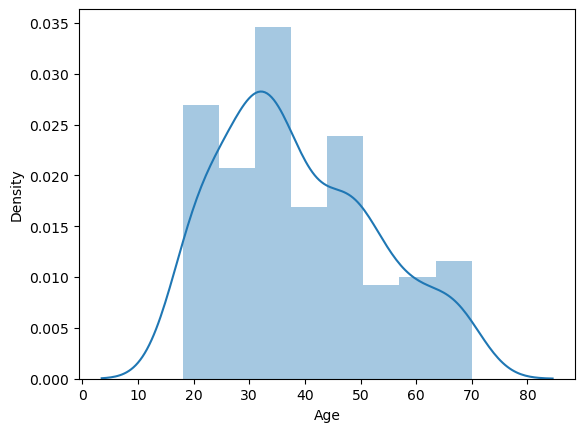

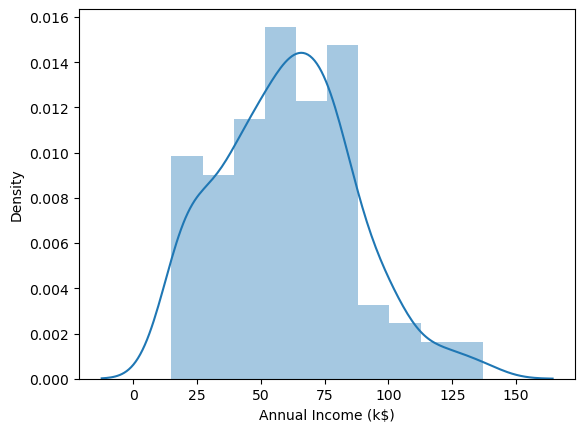

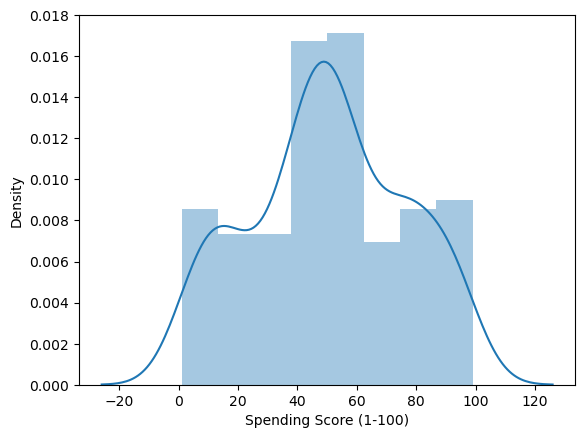

In [16]:
## looping to get figure for all in one
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in cols:
    plt.figure()  ## everytime you run create a visual
    sns.distplot(df[i]);

In [19]:
sns.kdeplot(df['Annual Income (k$)'], shade = True, hue = df['Gender']);


ValueError: The following variable cannot be assigned with wide-form data: `hue`

- Hue : uses to break by dimension , we can use Gender
- From the result we can see that female portion is much more frequent and there is outlier as we can see there is fat tail skewed towards right.

In [13]:
## looping to get figure for all in one
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in cols:
    plt.figure()  ## everytime you run create a visual
    sns.kdeplot((df[i]), shade = True, hue = df['Gender']);

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 640x480 with 0 Axes>

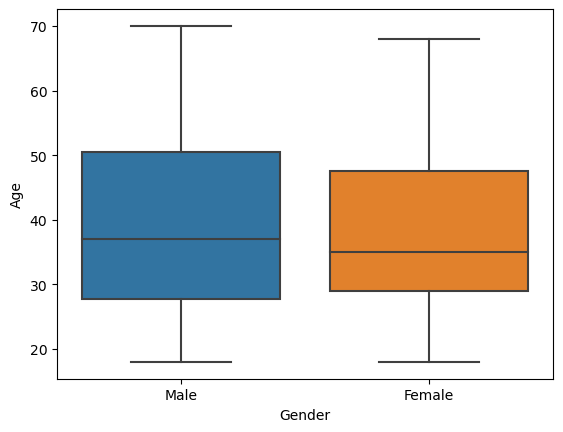

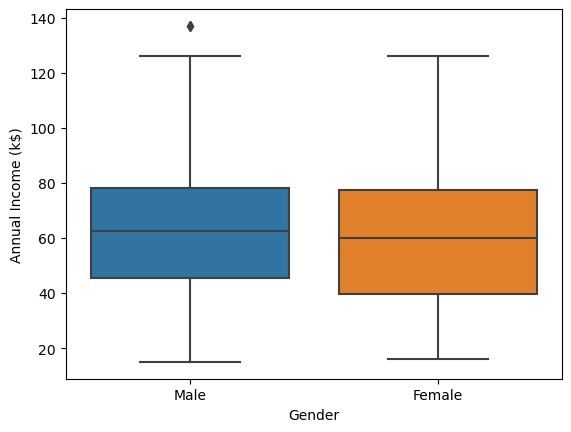

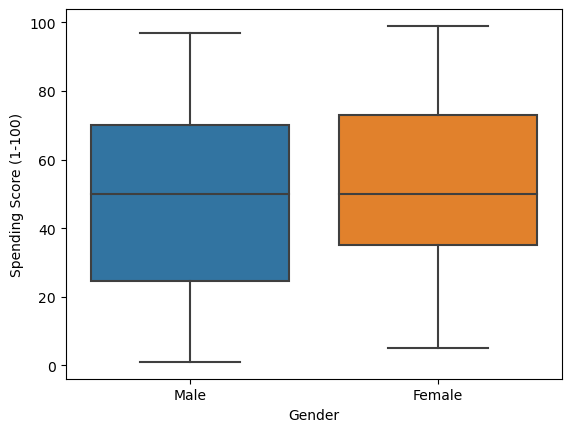

In [47]:
## looping to get figure for all in one
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in cols:
    plt.figure()  ## everytime you run create a visual
    sns.boxplot(data=df, x = 'Gender', y = df[i]);

In [50]:
df['Gender'].value_counts(normalize = True) ## getting the perentage

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Bivariate Analysis

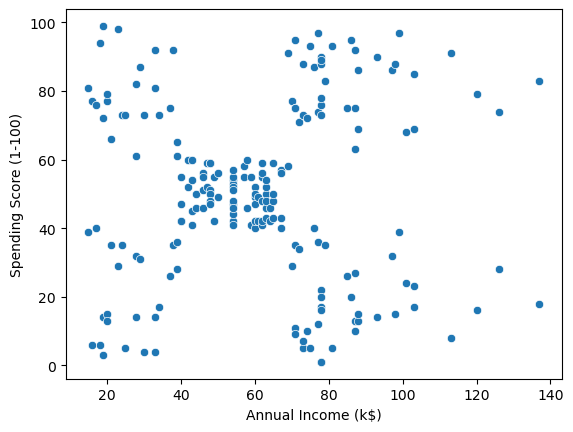

In [53]:
sns.scatterplot(data = df, x =  'Annual Income (k$)', y = 'Spending Score (1-100)' );

- In the result we can see there is some clustering and this tells there is bivariate clustering 

In [55]:
## drop the id: as it doesn't give any information
df = df.drop('CustomerID', axis  = 1)

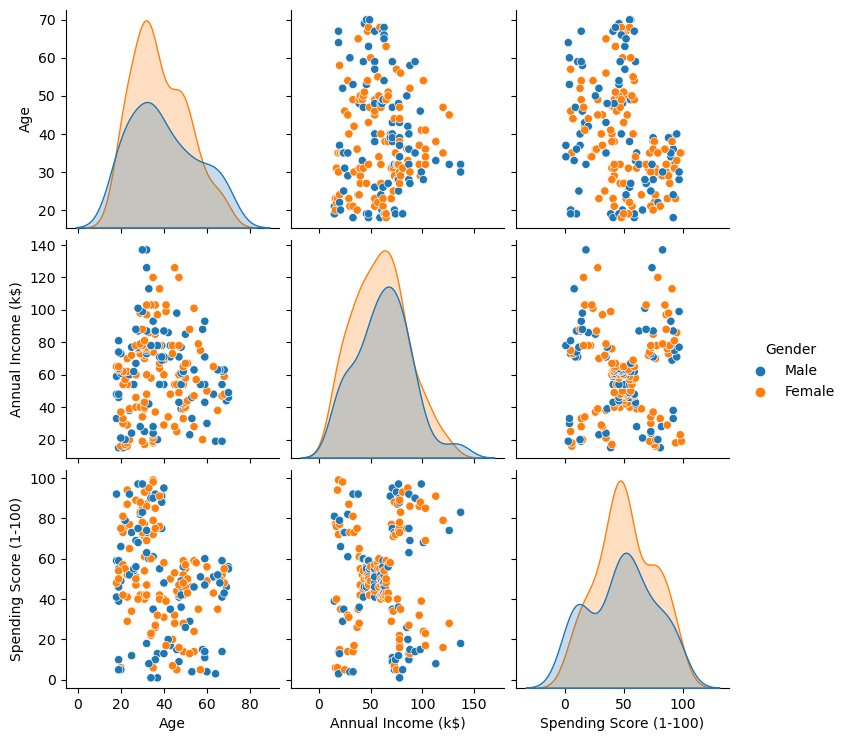

In [58]:
## easy way to explore
sns.pairplot(df, hue = 'Gender')

In [59]:
df.groupby('Gender').mean() # can specify that particular col you want as well

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [60]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


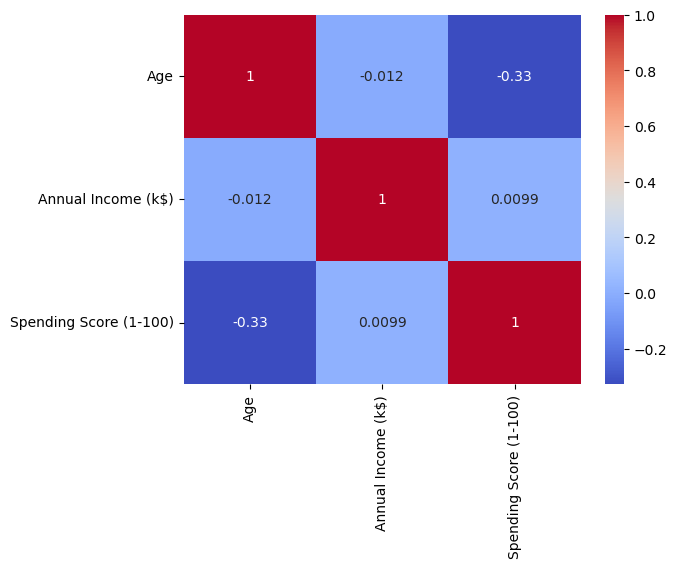

In [63]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');

## Next_step: Clustering
- Univariate_clustering
- Bivariate_clustering
- Multivariate_clustering


### Univariate Clustering : using one variable

In [96]:
clustering1 = KMeans(n_clusters = 3)

In [97]:
clustering1.fit(df[['Annual Income (k$)']])

C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [98]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [99]:
## add to the origional_dataset
df['income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [100]:
df['income Cluster'].value_counts()

2    90
0    74
1    36
Name: income Cluster, dtype: int64

In [101]:
clustering1.inertia_  ## give the distance between the centroids

23517.330930930937

In [92]:
intertia_scores = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(Kmeans.inertia_)

C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\sit

In [93]:
intertia_scores

[137277.28,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3962.5679936006027,
 2831.296031746033,
 2229.5897047397048,
 1762.9541125541127]

- The elbow rule or the elbow method is a heuristic approach that is used to determine the number of optimal principal components from the PCA results.

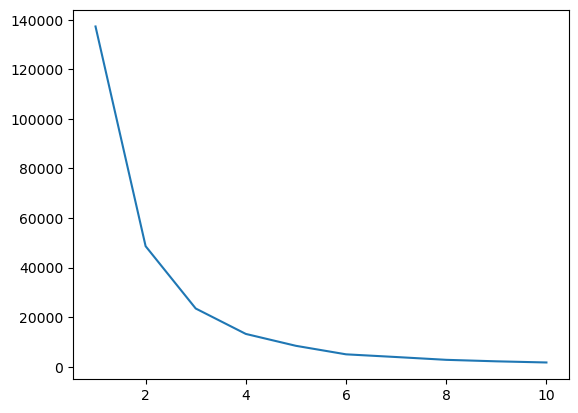

In [95]:
plt.plot(range(1,11),intertia_scores );

- From the result it looks like the elbow starts at 3, so you go back and change the n_clustoring in to 3

In [102]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income Cluster'],
      dtype='object')

In [104]:
## analysis to find the mean
df.groupby('income Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


### Bivariate clustering

In [117]:
clustering2 = KMeans(n_clusters = 5)

In [118]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income'] = clustering2.labels_
df.head()

C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\sit

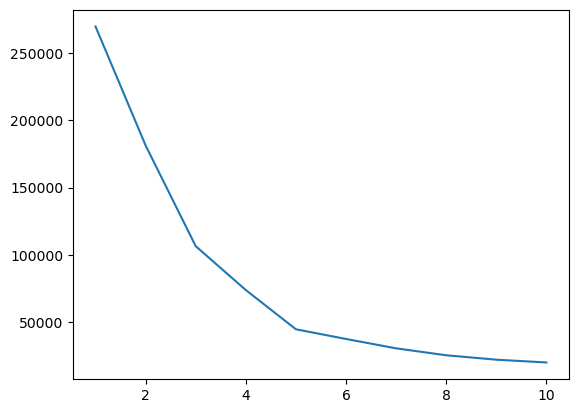

In [115]:
##3 optimize the cluster
intertia_scores2 = []
for i in range(1, 11):
    Kmeans2 = KMeans(n_clusters = i)
    Kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(Kmeans2.inertia_)
plt.plot(range(1,11), intertia_scores2)

- Here the elbaw is starting at 5 so we use the n_cluster as 5

In [130]:
clustering2.cluster_centers_ ## this gives the x and y variable for the centroid for all the 5 clustors

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [135]:
## Make a dataframe of the centroids : to add to the report
centers = pd.DataFrame(clustering2.cluster_centers_) 
centers.columns = ['x', 'y'] ## rename the columns
centers.head()

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,26.304348,20.913043
4,25.727273,79.363636


ValueError: Could not interpret value `Spending and Income` for parameter `hue`

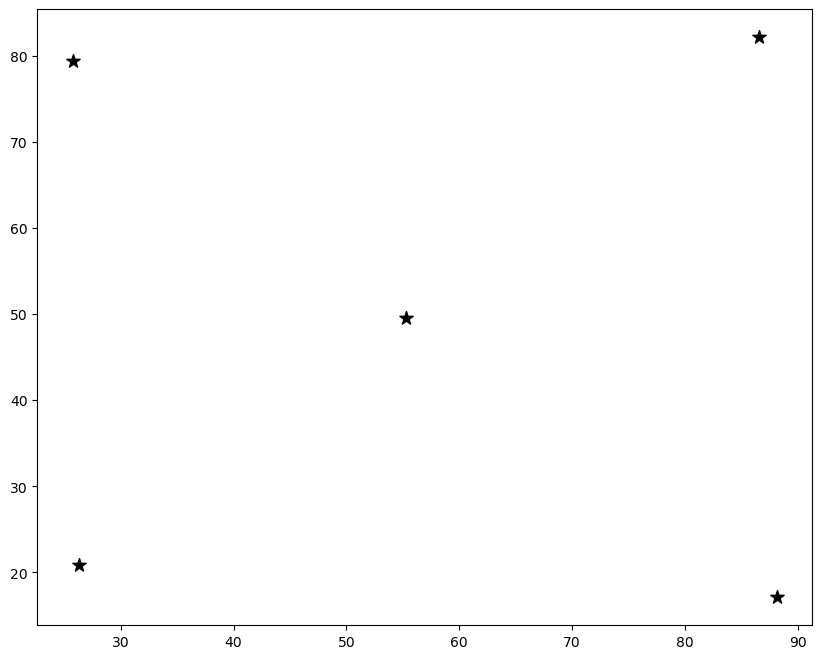

In [191]:
plt.figure(figsize = (10, 8))
plt.scatter(x=centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data =df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income', palette='tab10');
plt.savefig('clustering_bivariate.png')

In [137]:
pd.crosstab(df['Spending and Income'], df['Gender'])

Gender,Female,Male
Spending and Income,,
0,48,33
1,21,18
2,16,19
3,14,9
4,13,9


In [138]:
pd.crosstab(df['Spending and Income'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


- From the finding we can see that ..score 1 has the main target and has 0.538462 female and 0.461538 male

In [140]:
## analysis to find the mean
df.groupby('Spending and Income').mean()

,Age,Annual Income (k$),Spending Score (1-100),income Cluster
Spending and Income,,,,
0,42.716049,55.296296,49.518519,1.283951
1,32.692308,86.538462,82.128205,1.538462
2,41.114286,88.200000,17.114286,1.485714
3,45.217391,26.304348,20.913043,0.000000
4,25.272727,25.727273,79.363636,0.000000


#### Gender wise:
- Score 4: has the youngest value and has low income and high spending :)
- Score 1: has average number and with high income and high spending
- So the score 1 is the ideal one to run the campagn on

### Multivariate clustering

In [141]:
## working with the whole dataset need to be preprocessed
from sklearn.preprocessing import StandardScaler

In [147]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income
0,Male,19,15,39,0,3
1,Male,21,15,81,0,4
2,Female,20,16,6,0,3
3,Female,23,16,77,0,4
4,Female,31,17,40,0,3


In [146]:
df_n = pd.get_dummies(df)
df_n.head()

,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income,Gender_Female,Gender_Male
0,19,15,39,0,3,0,1
1,21,15,81,0,4,0,1
2,20,16,6,0,3,1,0
3,23,16,77,0,4,1,0
4,31,17,40,0,3,1,0


In [152]:
## we need one column of the dummy gender
df_n.drop('Gender_Female', axis = 1, inplace = True)

In [157]:
## get out columns
cols =  ['Age','Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
df_n = df_n[cols]
df_n.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [161]:
scale = StandardScaler()

In [170]:
df_n = scale.fit_transform(df_n)
df_n = pd.DataFrame(df_n)
df_n = df_n.rename(columns = {0 :'Age',
                              1:'Annual Income (k$)',
                              2:'Spending Score (1-100)',
                              3:'Gender_Male'})
df_n.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\sit

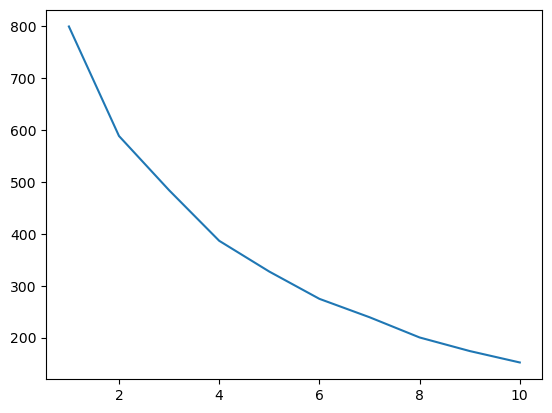

In [175]:
##3 optimize the cluster
intertia_scores3 = []
for i in range(1, 11):
    Kmeans3 = KMeans(n_clusters = i)
    Kmeans3.fit(df_n[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']])
    intertia_scores3.append(Kmeans3.inertia_)
plt.plot(range(1,11), intertia_scores3)

- From the finding we can see that at around 4 : there is the elbow

In [176]:
df.to_csv('Clustering.csv') ## save file for visualization

In [180]:
clustering3 = KMeans(n_clusters = 4)
clustering3.fit(df_n[['Annual Income (k$)','Spending Score (1-100)', 'Gender_Male']])
clustering3.labels_
df_n['Spending_Income_gender'] = clustering3.labels_
df_n.head()

C:\Users\Senait Alazar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Spending_Income_gender
0,-1.424569,-1.738999,-0.434801,1.128152,3
1,-1.281035,-1.738999,1.195704,1.128152,3
2,-1.352802,-1.700830,-1.715913,-0.886405,2
3,-1.137502,-1.700830,1.040418,-0.886405,2
4,-0.563369,-1.662660,-0.395980,-0.886405,2


AttributeError: 'Axes3DSubplot' object has no property 'xlabels'

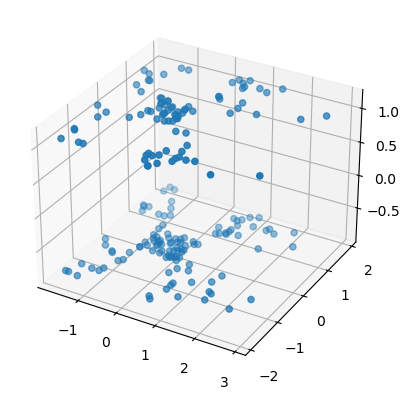

In [190]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df_n['Annual Income (k$)'], df_n['Spending Score (1-100)'], df_n['Gender_Male'] )
ax.set(xlabels=('Annual Income (k$)'),
       ylabels=('Spending Score (1-100)'),
       zlabels=('Gender_Male'))



In [ ]:
plt.figure(figsize = (10, 8))
#plt.scatter(x=centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data =df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income', palette='tab10')
plt.savefig('clustering_bivariate.png')